In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/CSE499B/dataset/data.yaml'

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 30.5 MB/s eta 0:00:00


In [ ]:
import torch

torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Sat Sep 14 19:37:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os

print(os.getcwd())

/content


In [ ]:
import torch

# Loading the .pt file
pt_file = torch.load("/content/drive/MyDrive/CSE499B/yolov8s-seg.pt")

# Printing the head of the file
print(pt_file)

<ipython-input-7-7e7ece19e519>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pt_file = torch.load("/content/drive/MyDrive/CSE499B/yolov8s-seg.pt")


{'epoch': -1, 'best_fitness': None, 'model': SegmentationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True

In [ ]:
!pip install ultralytics

from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/CSE499B/yolov8s-seg.pt")

results = model.train(data=dataset_path, epochs=15, augment=True)

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/CSE499B/yolov8s-seg.pt, data=/content/drive/MyDrive/CSE499B/dataset/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

100%|██████████| 755k/755k [00:00<00:00, 36.4MB/s]


Overriding model.yaml nc=80 with nc=44

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 171MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/CSE499B/dataset/data/labels/train.cache... 6760 images, 184 backgrounds, 3 corrupt: 100%|██████████| 6809/6809 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CSE499B/dataset/data/images/train/intraoral_lower-59-_JPEG_jpg.rf.c79c4104568abde0f964bbdbbf05cbda.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0237]
train: WARNING ⚠️ /content/drive/MyDrive/CSE499B/dataset/data/images/train/intraoral_lower-65-_JPEG_jpg.rf.0ccea1188d379f3c36a2925ac1825e69.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0112]
train: WARNING ⚠️ /content/drive/MyDrive/CSE499B/dataset/data/images/train/intraoral_lower-87-_JPEG_jpg.rf.dffee1f7ddc7c9779c0cd563e4dd4abc.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0111]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/CSE499B/dataset/data/labels/valid.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000208, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/15      5.97G      1.378      3.575      2.904      1.383        132        640: 100%|██████████| 426/426 [09:50<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         81       1420      0.501      0.569      0.555      0.315      0.387      0.437      0.387      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/15      5.61G      1.207      2.932      1.752      1.234        135        640: 100%|██████████| 426/426 [07:38<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.67s/it]

                   all         81       1420      0.721      0.658      0.737      0.432      0.553      0.514      0.497      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/15      5.59G      1.143      2.716       1.46      1.191        252        640: 100%|██████████| 426/426 [07:31<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.36s/it]


                   all         81       1420      0.751      0.748      0.799      0.458      0.605        0.6      0.573      0.246

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/15      5.91G      1.093      2.544      1.292      1.156        120        640: 100%|██████████| 426/426 [07:30<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all         81       1420      0.855      0.782      0.841      0.481      0.682      0.625      0.594      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/15      5.93G      1.046      2.421      1.177      1.132         94        640: 100%|██████████| 426/426 [07:29<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]


                   all         81       1420      0.822      0.813      0.855      0.507      0.656      0.667       0.62      0.276
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/15      5.43G     0.9614      2.216     0.9846      1.128        100        640: 100%|██████████| 426/426 [04:12<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]

                   all         81       1420      0.906       0.85      0.893      0.544      0.763      0.711      0.676      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/15      5.31G     0.9104      2.101     0.9066      1.099        103        640: 100%|██████████| 426/426 [04:16<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all         81       1420      0.919      0.867      0.919      0.551      0.743      0.711      0.675      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/15       5.3G     0.8731      2.033     0.8598      1.077         92        640: 100%|██████████| 426/426 [04:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all         81       1420      0.881      0.879      0.909      0.545      0.728      0.745      0.688      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/15      5.31G     0.8342      1.967     0.8176      1.059         66        640: 100%|██████████| 426/426 [04:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.01s/it]

                   all         81       1420      0.913       0.88       0.92      0.555      0.766      0.733      0.698      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/15      5.16G      0.803      1.911     0.7829      1.042         70        640: 100%|██████████| 426/426 [04:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         81       1420      0.893      0.854      0.918      0.574      0.741      0.714      0.698      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/15      5.21G     0.7774      1.861     0.7603       1.03         96        640: 100%|██████████| 426/426 [04:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.50it/s]

                   all         81       1420      0.884      0.851      0.909      0.557      0.756      0.713      0.704      0.331



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/15      5.19G     0.7525      1.822     0.7338      1.018         97        640: 100%|██████████| 426/426 [04:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]


                   all         81       1420      0.912      0.856      0.909      0.558      0.759      0.723      0.696      0.333

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/15      5.24G     0.7268      1.778     0.7073      1.008         97        640: 100%|██████████| 426/426 [04:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         81       1420      0.899      0.901      0.928      0.569      0.748      0.754      0.706      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/15      5.35G     0.7127      1.751     0.6852     0.9996         93        640: 100%|██████████| 426/426 [04:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         81       1420      0.895       0.87      0.914      0.567      0.748      0.732      0.705       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/15      5.33G     0.6959      1.722     0.6728     0.9935        105        640: 100%|██████████| 426/426 [04:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


                   all         81       1420      0.924      0.867      0.923      0.575      0.786      0.736       0.73      0.355

15 epochs completed in 1.375 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.9MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,796,628 parameters, 0 gradients, 42.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:01,  1.02it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:03<00:01,  1.70s/it]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]


                   all         81       1420      0.924      0.867      0.924      0.575      0.789      0.737      0.731      0.355
                    11         35         35          1      0.881       0.99      0.666      0.702      0.607      0.594      0.249
                    12         35         35          1       0.95      0.995      0.586      0.726      0.683       0.56      0.286
                    13         34         34          1      0.872      0.988      0.612      0.897      0.768      0.838      0.365
                    14         30         30      0.946        0.9      0.969      0.547      0.877      0.833      0.898      0.405
                    15         29         29      0.945      0.862      0.972      0.674      0.908      0.828      0.832      0.437
                    16         26         26      0.942      0.885      0.941      0.692       0.82      0.769      0.724       0.26
                    17         18         18      0.866          1   

In [ ]:
type(results)

ultralytics.utils.metrics.SegmentMetrics

In [ ]:
print(results)

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1f78454ac0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028, 

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!scp -r /content/runs/segment/train '/content/drive/MyDrive/CSE499B/runs'

In [ ]:
from ultralytics import SAM

model = SAM('/content/drive/MyDrive/CSE499B/sam_b.pt')

model.info()

print(model)

Model summary: 243 layers, 93,735,472 parameters, 93,735,472 gradients
SAM(
  (model): SAMModel(
    (image_encoder): ImageEncoderViT(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (blocks): ModuleList(
        (0-11): 12 x Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): REAttention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (lin1): Linear(in_features=768, out_features=3072, bias=True)
            (lin2): Linear(in_features=3072, out_features=768, bias=True)
            (act): GELU(approximate='none')
          )
        )
      )
      (neck): Sequential(
        (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1)

In [ ]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data='/content/drive/MyDrive/CSE499B/dataset/data/images/train', det_model='/content/drive/MyDrive/CSE499B/runs/segment/train/weights/best.pt', sam_model='/content/drive/MyDrive/CSE499B/sam_b.pt', output_dir='/content/drive/MyDrive/Runs_SAM/autoannotation_sam_yolov8')


image 1/6809 /content/drive/MyDrive/CSE499B/dataset/data/images/train/blur h t (1).jpg: 640x640 1 33, 1 34, 1 35, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 calculus, 1 tongue, 21.0ms
image 2/6809 /content/drive/MyDrive/CSE499B/dataset/data/images/train/blur h t (10).jpg: 640x640 1 31, 1 32, 2 33s, 1 34, 1 35, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 2 47s, 2 amalgam fillings, 1 staining or visible changes without cavitation, 1 tongue, 5 visible changes with microcavitations, 10.0ms
image 3/6809 /content/drive/MyDrive/CSE499B/dataset/data/images/train/blur h t (11).jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 3 43s, 1 incisive papilla, 4 non-carious lesions, 1 palatine raphe, 4 staining or visible changes without cavitations, 28.8ms
image 4/6809 /content/drive/MyDrive/CSE499B/dataset/data/images/train/blur h t (12).jpg: 640x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 2 non-carious lesions, 3 staining or visible change

KeyboardInterrupt: 

In [ ]:
model.predict('/content/drive/MyDrive/CSE499B/dataset/data/images/test/blur h t (16).jpg', save=True)


image 1/1 /content/drive/MyDrive/CSE499B/dataset/data/images/test/blur h t (16).jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 9598.5ms
Speed: 12.3ms preprocess, 9598.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15', 16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22', 23: '23', 24: '24'}
 obb: None
 orig_img: array([[[130, 161, 192],
         [129, 160, 191],
         [128, 159, 190],
         ...,
         [ 99,  92,  73],
         [ 99,  92,  73],
         [ 99,  92,  73]],
 
        [[133, 164, 195],
         [131, 162, 193],
         [130, 161, 192],
         ...,
         [ 99,  92,  73],
         [ 99,  92,  73],
         [ 99,  92,  73]],
 
        [[135, 166, 197],
         [134, 165, 196],
         [130, 164, 194],
         ...,
         [ 99,  92,  73],
         [ 99,  92,  73],
         [ 99,  92,  73]],
 
        ...,
 
        [[219, 211, 251],
     

In [ ]:
!scp -r 'runs/segment/predict' '/content/drive/MyDrive/CSE499B/Runs_Predict_499'

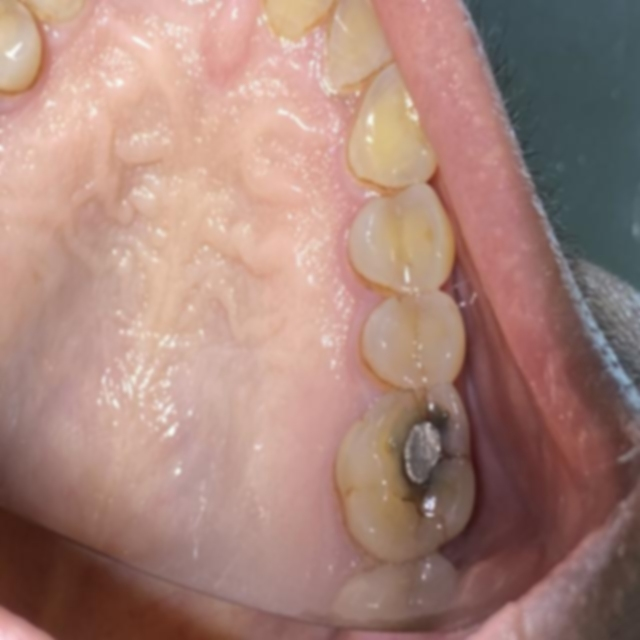

In [ ]:
from IPython.display import display, Image

Image(filename='/content/drive/MyDrive/CSE499B/dataset/data/images/test/blur h t (16).jpg', height=333, width=333)

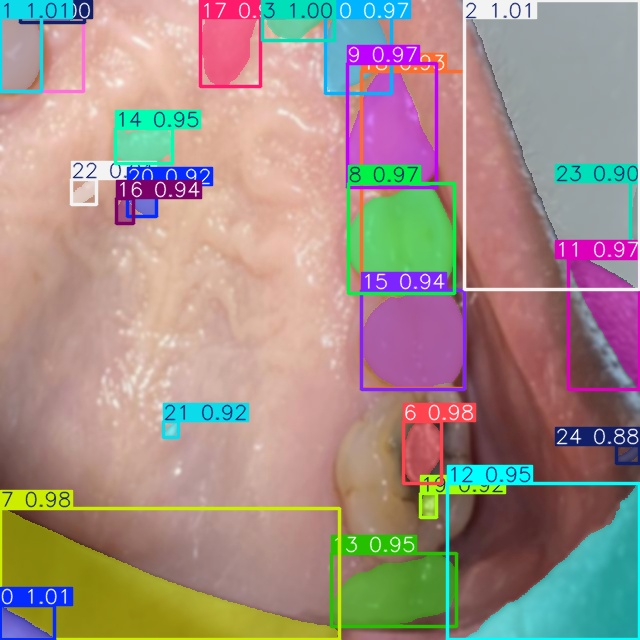

In [ ]:
Image(filename='/content/drive/MyDrive/CSE499B/Runs_Predict_499/blur h t (16).jpg', height=333, width=333)

In [ ]:
import os

from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/CSE499B/runs/segment/train/weights/best.pt')

results_second_round= model.predict(source='/content/drive/MyDrive/CSE499B/dataset/data/images/valid', save=True)


image 1/81 /content/drive/MyDrive/CSE499B/dataset/data/images/valid/intraoral_lower-1-_JPEG.rf.4f123b84618ecafd3187c32f19d8960a.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 2 43s, 2 45s, 1 46, 1 staining or visible changes without cavitation, 1 tongue, 21.0ms
image 2/81 /content/drive/MyDrive/CSE499B/dataset/data/images/valid/intraoral_lower-1-_JPEG.rf.59d67462eba5f2aa3a1ea8fa85d7a9e7.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 2 43s, 1 44, 1 45, 1 46, 1 staining or visible changes without cavitation, 1 tongue, 21.0ms
image 3/81 /content/drive/MyDrive/CSE499B/dataset/data/images/valid/intraoral_lower-1-_JPEG.rf.a84475480c5e1c452900df7711e688fb.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 2 43s, 2 45s, 1 46, 1 staining or visible changes without cavitation, 1 tongue, 20.4ms
image 4/81 /content/drive/MyDrive/CSE499B/dataset/data/images/valid/intraoral_lower-10-_JPEG.rf.e8d9f351d924748ec7b449c9efe3aa2c.jpg: 640x640 1 33, 

In [ ]:
type(results)

ultralytics.utils.metrics.SegmentMetrics

In [ ]:
!scp -r runs/segment/predict2 '/content/drive/MyDrive/CSE499B/predict_batch'

In [ ]:
model.val(save=True)

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/CSE499B/dataset/data/labels/valid.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.31s/it]


                   all         81       1420      0.861      0.796      0.882       0.51      0.718      0.655      0.654      0.284
                    11         35         35      0.837      0.857      0.919      0.573      0.417      0.429      0.294      0.145
                    12         35         35      0.811      0.886      0.957      0.485      0.521      0.571      0.435      0.204
                    13         34         34       0.91          1      0.982      0.577      0.802      0.882      0.764      0.318
                    14         30         30      0.921          1      0.942      0.568      0.766      0.833      0.723      0.334
                    15         29         29      0.915      0.862      0.977      0.653      0.793      0.759      0.732       0.35
                    16         26         26      0.746          1      0.959      0.624      0.515      0.692      0.603      0.215
                    17         18         18      0.569      0.735   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1f787d78b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028, 

In [ ]:
!scp -r 'runs/segment/val' '/content/drive/MyDrive/CSE499B/model_val_results'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSE499B/runs/train/results.csv')

In [ ]:
print(df)

                      epoch           train/box_loss           train/seg_loss  \
0                         1                  1.37790                   3.5754   
1                         2                  1.20670                   2.9322   
2                         3                  1.14350                   2.7161   
3                         4                  1.09320                   2.5438   
4                         5                  1.04560                   2.4210   
5                         6                  0.96139                   2.2164   
6                         7                  0.91040                   2.1008   
7                         8                  0.87313                   2.0335   
8                         9                  0.83421                   1.9668   
9                        10                  0.80302                   1.9109   
10                       11                  0.77743                   1.8614   
11                       12 